In [72]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import os 
import seaborn as sns

In [73]:
# Chargement des données
LED5 = pd.read_csv('led5.csv')
INC9 = pd.read_csv('INC9.csv')

#Rajouter la target
LED5['Target'] = 1 # 1 pour les images avec la lampe LED
INC9['Target'] = 0 # 0 pour les images avec la lampe INC

In [74]:
IM = pd.concat([LED5,INC9],ignore_index=True,axis=0)

In [77]:
pd.options.display.max_columns = IM.shape[1]
IM

,Slice,Count,Total Area,Average Size,%Area,Mean,Mode,Perim.,Major,Minor,Angle,Circ.,Solidity,Feret,FeretX,FeretY,FeretAngle,MinFeret,IntDen,Median,Skew,Kurt,Target
0,51,14,38135,2723.929,2.909,86.579,90.857,143.953,40.540,34.827,44.695,0.793,0.929,42.544,858.857,539.286,93.464,34.439,309414.500,88.786,0.361,-0.429,1
1,52,17,39036,2296.235,2.978,85.498,89.000,117.339,34.356,29.124,59.768,0.845,0.946,35.832,832.647,566.412,128.696,28.844,270091.059,87.647,0.009,-0.707,1
2,53,21,39765,1893.571,3.034,76.327,77.762,97.960,28.346,24.376,44.345,0.882,0.954,30.363,778.905,581.095,124.770,24.119,204983.667,77.952,0.351,-0.730,1
3,54,17,39075,2298.529,2.981,89.418,93.059,118.134,34.364,29.340,72.186,0.856,0.930,35.800,773.176,568.824,117.800,29.034,268374.235,91.706,0.008,-0.955,1
4,55,12,38424,3202.000,2.932,95.396,100.833,160.796,46.497,40.197,54.031,0.854,0.974,48.290,840.667,468.583,122.271,39.527,378048.917,98.417,-0.317,-0.620,1
5,56,23,38961,1693.957,2.972,81.677,83.130,87.903,25.594,21.760,47.485,0.899,0.959,26.572,767.435,541.130,131.222,21.425,202191.435,83.435,0.045,-0.917,1
6,57,19,39300,2068.421,2.998,84.080,87.737,107.275,31.191,26.214,55.333,0.852,0.960,32.211,793.684,584.737,121.507,25.875,242080.053,86.053,-0.161,-0.892,1
7,58,16,38987,2436.688,2.974,91.299,95.188,125.593,35.954,30.880,59.398,0.865,0.961,37.252,774.875,592.500,120.585,30.399,278886.938,93.312,0.028,-0.820,1
8,91,202,153869,761.728,11.739,31.788,31.059,51.961,12.041,5.741,42.162,0.741,0.926,12.731,558.639,725.733,133.041,6.055,30685.743,31.762,1.049,0.351,0
9,92,215,152544,709.507,11.638,31.761,31.070,53.301,12.765,5.340,26.485,0.665,0.950,13.056,575.349,727.549,144.781,5.527,28725.953,31.758,0.737,-0.341,0


In [21]:
IM.dtypes # Toutes les variables sont numériques 

Slice             int64
Count             int64
Total Area        int64
Average Size    float64
%Area           float64
Mean            float64
Mode            float64
Perim.          float64
Major           float64
Minor           float64
Angle           float64
Circ.           float64
Solidity        float64
Feret           float64
FeretX          float64
FeretY          float64
FeretAngle      float64
MinFeret        float64
IntDen          float64
Median          float64
Skew            float64
Kurt            float64
Target            int64
dtype: object

* Slice: Numéro de la coupe dans une série d'images empilées.

* Count: Nombre d'objets détectés dans l'image ou la coupe.

* Total Area: Surface totale couverte par les objets détectés.

* Average Size: Taille moyenne des objets détectés.

* %Area: Pourcentage de la zone totale de l'image couverte par les objets.

*  Mean: Moyenne d'intensité de pixel dans les objets ou les régions mesurées.

* Mode: Valeur la plus fréquente de l'intensité des pixels dans les objets.

* Perim. (Perimeter): Périmètre total des objets.

* Major (Major Axis Length): Longueur de l'axe majeur du plus grand objet ou de l'ellipse qui s'adapte le mieux à l'objet.

* Minor (Minor Axis Length): Longueur de l'axe mineur de cette ellipse.

* Angle: Orientation de l'objet ou de l'axe majeur de l'ellipse par rapport à un axe horizontal.

* Circ. (Circularity): Mesure de la rondeur de l'objet (1 = parfaitement circulaire).

* Solidity: Rapport de l'aire de l'objet à l'aire du convexe le plus proche.

* Feret: La distance de Feret, c'est-à-dire la distance entre les points les plus éloignés de l'objet.

* FeretX, FeretY: Coordonnées en X et Y du point initial de la distance de Feret.

* FeretAngle: Angle de la ligne de Feret par rapport à un axe horizontal.

* MinFeret: La plus petite distance entre des points parallèles autour de l'objet.

* IntDen (Integrated Density): La somme des valeurs d'intensité des pixels dans l'objet.

* Median: Médiane de l'intensité des pixels dans les objets.

* Skew (Skewness): Asymétrie de la distribution de l'intensité des pixels dans les objets.

* Kurt (Kurtosis): Mesure de la "pointedness" ou de l'aplatissement de la distribution de l'intensité des pixels.


------------------- Features en lien avec les nuance de gris : ----------------------

Les features en lien avec les nuances de gris sont les suivantes : Mean, Mode, IntDen, Median, Skew, Kurt


Text(0.5, 1.0, 'Matrice des corrélations entre les variables')

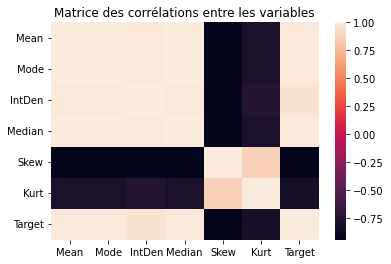

In [93]:
grey_col = ["Mean", "Mode", "IntDen", "Median", "Skew", "Kurt","Target"]

sns.heatmap(IM[grey_col].corr())
plt.title("Matrice des corrélations entre les variables")

/home/ibotcazou/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/ibotcazou/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


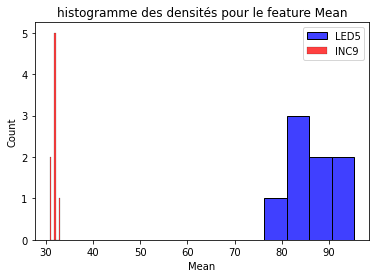

/home/ibotcazou/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/ibotcazou/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


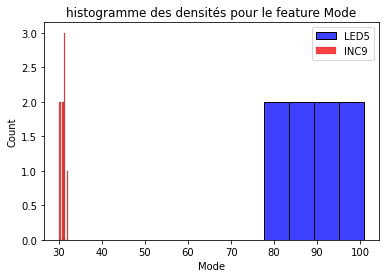

/home/ibotcazou/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/ibotcazou/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


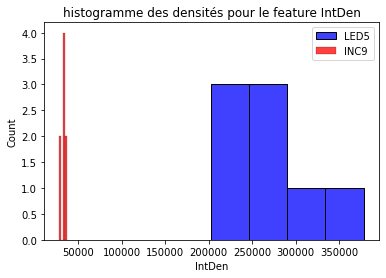

/home/ibotcazou/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/ibotcazou/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


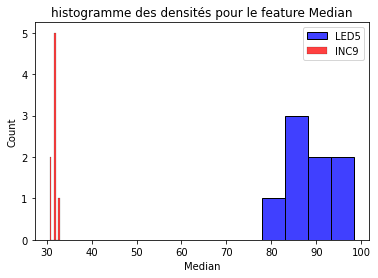

/home/ibotcazou/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/ibotcazou/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


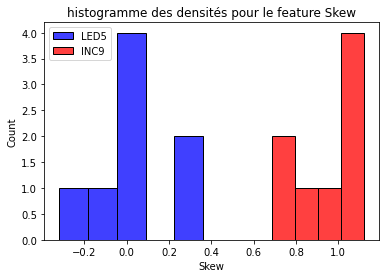

/home/ibotcazou/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/ibotcazou/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


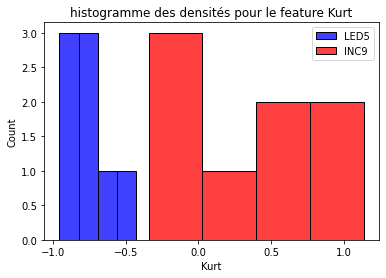

In [82]:
for col in grey_col:
    if col != 'Target':

        sns.histplot(data=LED5, x=col, color="blue", label='LED5')
        sns.histplot(data=INC9, x=col, color="red", label='INC9')
        plt.legend()
        plt.title(f'histogramme des densités pour le feature {col}')
        plt.show()


# Prediction via du machine learning 

In [70]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score # pour voir l'efficacité globale du modèle
from sklearn.metrics import confusion_matrix


## Classification avec des arbres de décision peu profond

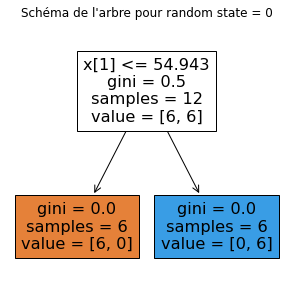

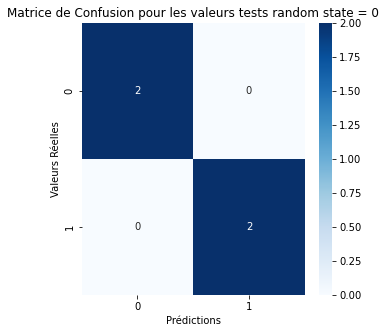

accuracy_score(predict_test,y_test) 1.0
accuracy_score(predict_train,y_train) 1.0


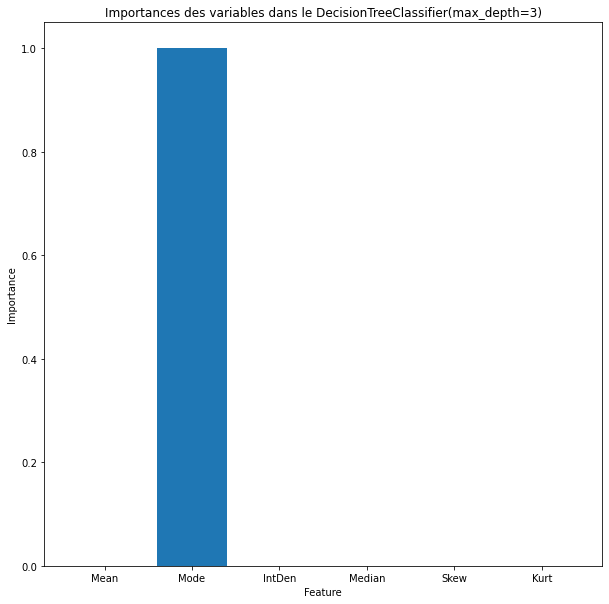

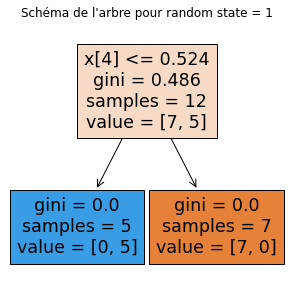

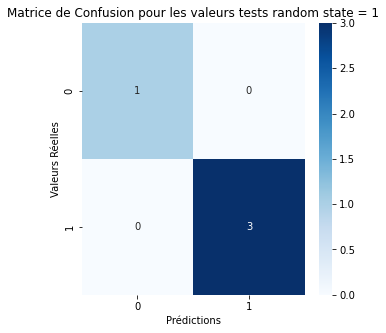

accuracy_score(predict_test,y_test) 1.0
accuracy_score(predict_train,y_train) 1.0


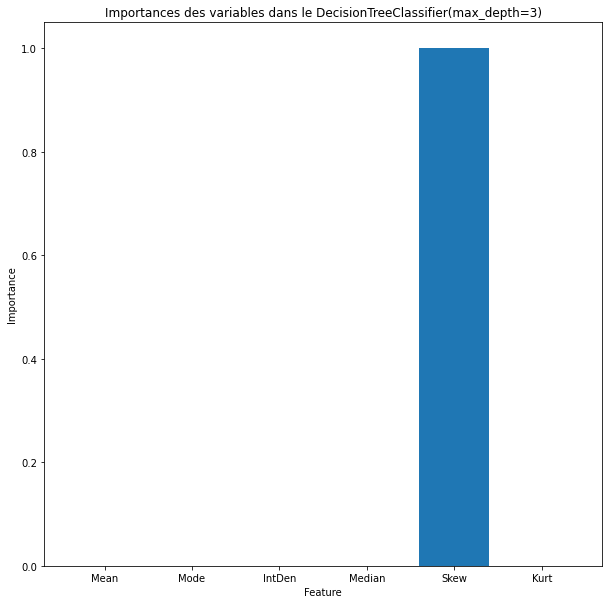

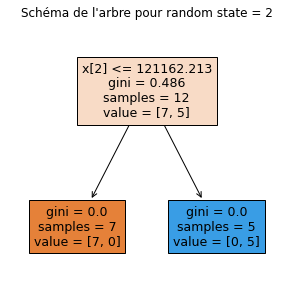

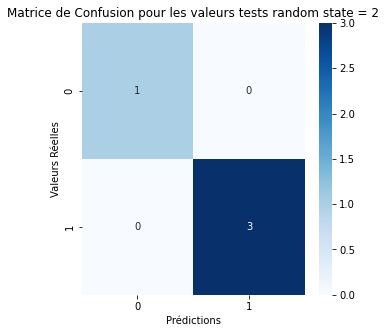

accuracy_score(predict_test,y_test) 1.0
accuracy_score(predict_train,y_train) 1.0


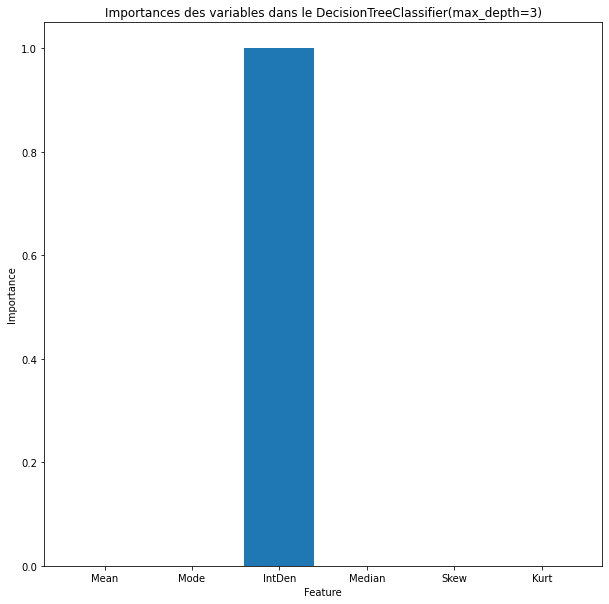

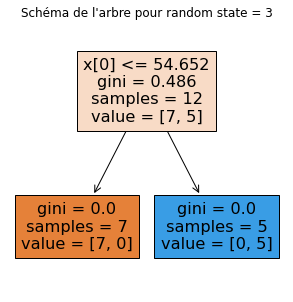

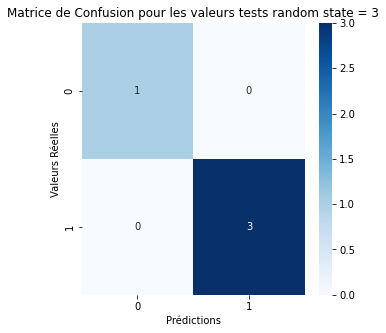

accuracy_score(predict_test,y_test) 1.0
accuracy_score(predict_train,y_train) 1.0


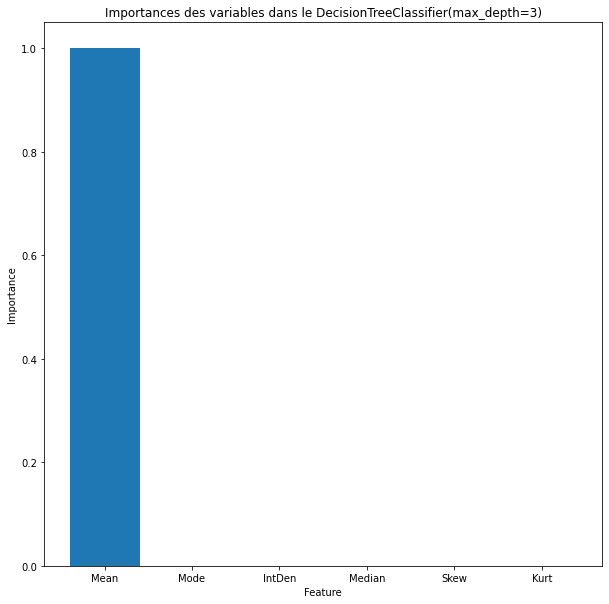

In [87]:
x_train,x_test,y_train,y_test = {},{},{},{}

for i in range(4): # Cela permet une cross validation grâce au random_state qui varie

    x_train[f'{i}'],x_test[f'{i}'],y_train[f'{i}'],y_test[f'{i}']= train_test_split(IM[["Mean", "Mode", "IntDen", "Median", "Skew", "Kurt"]], IM.Target, random_state=i, test_size=0.2)

    tree1 = DecisionTreeClassifier(max_depth=3)
    tree1.fit(x_train[f'{i}'],y_train[f'{i}'])

    predict_train = tree1.predict(x_train[f'{i}'])
    predict_test = tree1.predict(x_test[f'{i}'])

    # Calcul de la matrice de confusion
    conf_matrix = confusion_matrix(predict_test, y_test[f'{i}'])

    # Affichage de l'arbre
    plt.figure(figsize=(5,5))
    plot_tree(tree1, filled=True) #filled=True colorant les noeuds pour indiquer la majorité de la classe.
    plt.title(f"Schéma de l'arbre pour random state = {i}")
    plt.show()

    # Création de la heatmap avec Seaborn
    plt.figure(figsize=(5, 5))
    sns.heatmap(conf_matrix, annot=True, fmt='g',cmap='Blues') #fmt='g' sert à éviter l'affichage scientifique des nombres
    #plt.colormaps() pour avoir d'autres couleurs de cmap
    plt.xlabel('Prédictions')
    plt.ylabel('Valeurs Réelles')
    plt.title(f'Matrice de Confusion pour les valeurs tests random state = {i}')
    plt.show()

    print("accuracy_score(predict_test,y_test)" , accuracy_score(predict_test,y_test[f'{i}']))
    print("accuracy_score(predict_train,y_train)" , accuracy_score(predict_train,y_train[f'{i}']))

    plt.figure(figsize=(10, 10))
    features_names = x_train[f'{i}'].columns
    features_importantes = tree1.feature_importances_
    plt.bar(features_names,features_importantes)    
    plt.title(f"Importances des variables dans le {tree1}")
    plt.xlabel("Feature")
    plt.ylabel("Importance")
    plt.show()


## Classification avec de la régression logistique

[[4.94076136e-09 9.99999995e-01]
 [1.12219334e-06 9.99998878e-01]
 [9.99499029e-01 5.00971240e-04]
 [9.99669468e-01 3.30532329e-04]]


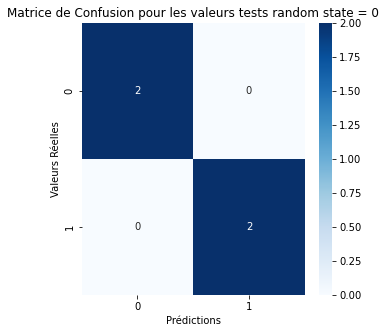

accuracy_score(predict_test,y_test) 1.0
accuracy_score(predict_train,y_train) 1.0
[[4.59824615e-08 9.99999954e-01]
 [9.99112714e-01 8.87286358e-04]
 [1.09786914e-08 9.99999989e-01]
 [7.52709706e-05 9.99924729e-01]]


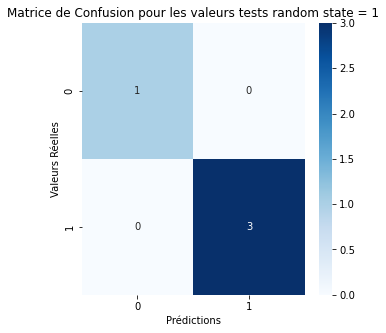

accuracy_score(predict_test,y_test) 1.0
accuracy_score(predict_train,y_train) 1.0
[[9.99072262e-01 9.27737876e-04]
 [2.44249065e-14 1.00000000e+00]
 [2.24758436e-02 9.77524156e-01]
 [2.64057887e-10 1.00000000e+00]]


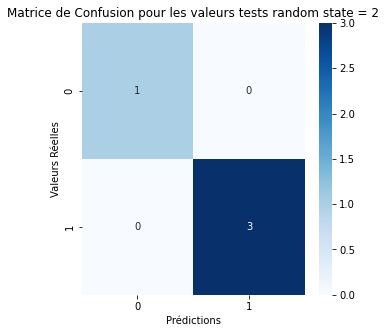

accuracy_score(predict_test,y_test) 1.0
accuracy_score(predict_train,y_train) 1.0
[[1.01376344e-08 9.99999990e-01]
 [9.99115045e-01 8.84954646e-04]
 [0.00000000e+00 1.00000000e+00]
 [4.80688311e-09 9.99999995e-01]]


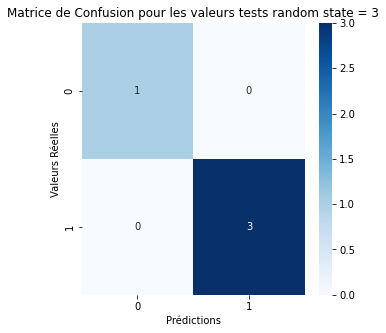

accuracy_score(predict_test,y_test) 1.0
accuracy_score(predict_train,y_train) 1.0


In [92]:
from sklearn.linear_model import LogisticRegression


x_train,x_test,y_train,y_test = {},{},{},{}

for i in range(4): # Cela permet une cross validation grâce au random_state qui varie

    x_train[f'{i}'],x_test[f'{i}'],y_train[f'{i}'],y_test[f'{i}']= train_test_split(IM[["Mean", "Mode", "IntDen", "Median", "Skew", "Kurt"]], IM.Target, random_state=i, test_size=0.2)

    logistic_mod = LogisticRegression(random_state=0)
    logistic_mod.fit(x_train[f'{i}'],y_train[f'{i}'])

    predict_train = logistic_mod.predict(x_train[f'{i}'])
    predict_test = logistic_mod.predict(x_test[f'{i}'])


    # Calcul de la matrice de confusion
    conf_matrix = confusion_matrix(predict_test, y_test[f'{i}'])

    print(logistic_mod.predict_proba(x_test[f'{i}']))

    # Création de la heatmap avec Seaborn
    plt.figure(figsize=(5, 5))
    sns.heatmap(conf_matrix, annot=True, fmt='g',cmap='Blues') #fmt='g' sert à éviter l'affichage scientifique des nombres
    #plt.colormaps() pour avoir d'autres couleurs de cmap
    plt.xlabel('Prédictions')
    plt.ylabel('Valeurs Réelles')
    plt.title(f'Matrice de Confusion pour les valeurs tests random state = {i}')
    plt.show()

    print("accuracy_score(predict_test,y_test)" , accuracy_score(predict_test,y_test[f'{i}']))
    print("accuracy_score(predict_train,y_train)" , accuracy_score(predict_train,y_train[f'{i}']))


